In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from   statsmodels.tsa.stattools import acf, pacf

%matplotlib inline

In [5]:
n = 600
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1 = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

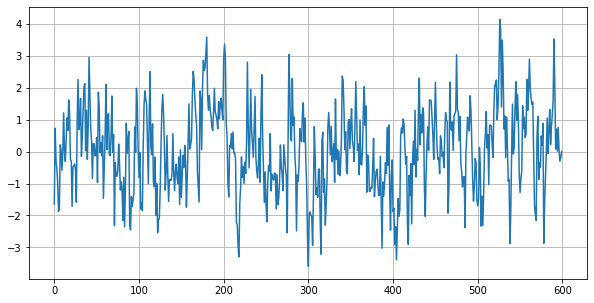

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(ar1);
plt.grid(True)

In [17]:
ar1_acf, acf_ci = acf(ar1, alpha=0.05)
ar1_pacf, pacf_ci = pacf(ar1, alpha=0.05)

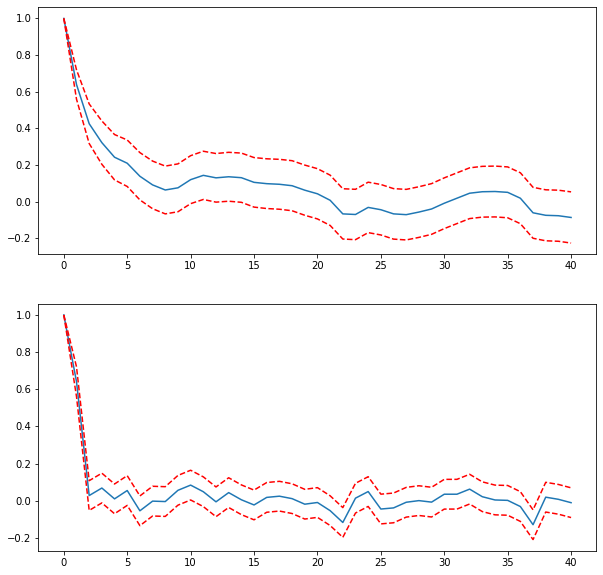

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(ar1_acf)
plt.plot(acf_ci, 'r--')
plt.subplot(212)
plt.plot(pacf(ar1))
plt.plot(pacf_ci, 'r--');

In [24]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

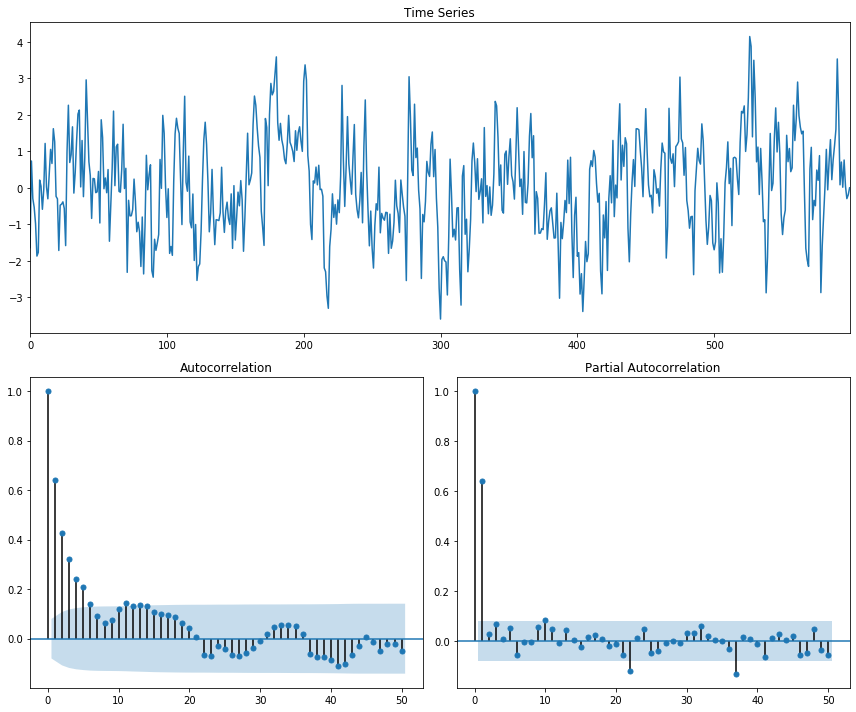

In [27]:
plotds(ar1)